# Visualizing XVHLScaffold

This notebook uses GraphViz to visualize rows in the XVHLScaffold,
and demonstrate how the `swap()` and `subst()` functions work.

In [292]:
!pip3 install graphviz

You should consider upgrading via the 'c:\python36\python.exe -m pip install --upgrade pip' command.


In [293]:
from itertools import tee

import graphviz

def pairs(xs):
    xs, ys = tee(xs)
    next(ys, None)
    return zip(xs, ys)


def row(g, name, active, nodes, **kw):
    with g.subgraph(name=name) as c:
        c.attr(rank='same')
        c.attr('node', **kw)
        for x in nodes:
            color = 'black' if x in active else FADE
            c.node(x, group=name, color=color, fontcolor=color)
        # force them to flow left-to right
        for x,y in pairs([name]+nodes): c.edge(x,y,style='invis')
        c.node(name, label='row '+name, width="1", shape='none', fontcolor=FADE, group='clusters')


def edge_color(v):
    return FADE if v[0] in 'zt' else 'black'

def node(g, v, hi, lo):
    g.edge(v, hi, style='solid', color=edge_color(v))
    g.edge(v, lo, style='dashed', color=edge_color(v))

def row_order(g, cs):
    for x, y in pairs(cs):
        g.edge(x, y, style='invis')

FADE = "#ccccee"

def vhl_scaffold(seq, vhls):
    g = graphviz.Digraph()
    g.attr(rankdir='TB', labeljust='l', newrank='true', remincross='false', pencolor=FADE)
    g.attr('node', shape='circle', width="0.4", fixedsize="true")

    active = {x[0] for x in vhls if x[0][0] in 'wv'}

    row(g, 'z', active, ['z0', 'z1', 'z2', 'z3'], color=FADE, fontcolor=FADE)
    row(g, 'w', active, ['w0', 'w1', 'w2'])
    row(g, 'v', active, ['v0', 'v1', 'v2'])
    row(g, 't', active, ['t0', 't1', 't2', 't3'], color=FADE, fontcolor=FADE)
    row_order(g, seq)

    for vhl in vhls: node(g, *vhl)
    return g

# Row Swapping with Independent Nodes

This is one of the simplest possible examples.

When a node on either row is independent, it simply stays in place as the rows are swapped.

Note that nodes on row w are _always_ independent of row v, because edges in the scaffold always point downward.


## before

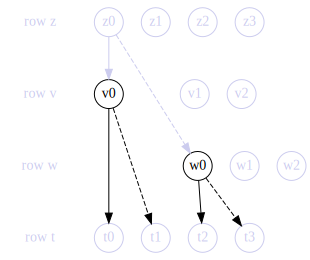

In [294]:
vhl_scaffold('zvwt', [
    ['z0', 'v0', 'w0'],
    ['v0', 't0', 't1'],
    ['w0', 't2', 't3']
])

## after

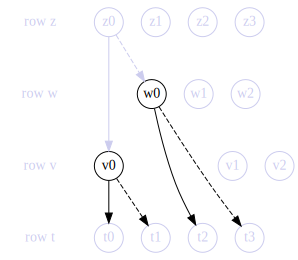

In [295]:
vhl_scaffold('zwvt', [
    ['z0', 'v0', 'w0'],
    ['v0', 't0', 't1'],
    ['w0', 't2', 't3']
])

# Row Swapping with Dependent Nodes



## before

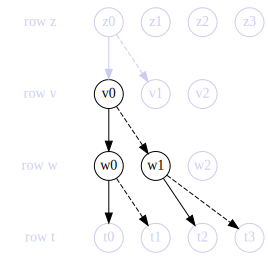

In [310]:
vhl_scaffold('zvwt', [
    ['z0', 'v0', 'v1'],
    ['v0', 'w0', 'w1'],
    ['w0', 't0', 't1'],
    ['w1', 't2', 't3'],
])

## after

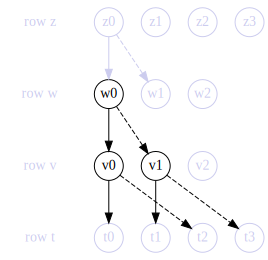

In [314]:

vhl_scaffold('zwvt', [
    ['z0', 'w0', 'w1'],
    ['w0', 'v0', 'v1'],
    ['v0', 't0', 't2'],
    ['v1', 't1', 't3'],
])

# Dependent on only one side
## before

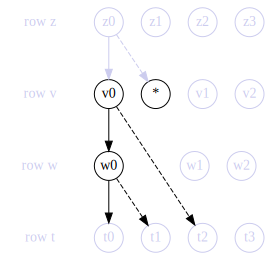

In [325]:
vhl_scaffold('zvwt', [
    ['z0', 'v0', '*'],
    ['v0', 'w0', 't2'],
    ['w0', 't0', 't1'],
])

## after

Note that an extra node has been created.

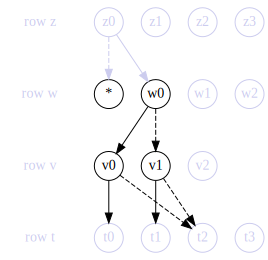

In [328]:
vhl_scaffold('zwvt', [
    ['z0', 'w0', '*'],
    ['w0', 'v0', 'v1'],
    ['v0', 't0', 't2'],
    ['v1', 't1', 't2'],
])


todo: special case when one side collapses
todo: show when a w-node would be deleted but there are references from outside row v
